<a href="https://colab.research.google.com/github/TahaAhmed03/Physics-4AL-Code/blob/main/Copy_of_05_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions

*developed by Pauline Arriaga*

Funnctions in programming operate like functions in mathematics. A function in math takes an input, manipulates that input and gives an output. Consider the formula

$f(x) = x + 5$

Functions in programming work with the same syntax as functions in math, where we have the name of the function (in the above example f) and the variable in parenthases. We start each function with 



```
def functionname(arguments):
```

Where def is in every function declaration, and there is a colon at the end of every statement. Everything inside the colon has to be indented or python will not read it as part of the function! Indentation in Python is very important.


Each function returns with "return something". When the function is called, that something will be output.


In [ ]:
def add_five(x):
   y = x + 5.
   return y

In [ ]:
print('f(2) = ' + str(add_five(2.)))
print('f(5) = ' + str(add_five(5.)))
print('f(9) = ' + str(add_five(9.)))

f(2) = 7.0
f(5) = 10.0
f(9) = 14.0


As shown below, functions can have two inputs, separated by commas

In [1]:
import numpy as np

In [2]:
def find_distance(x, y):
  distance = np.sqrt(x**2. + y**2.)
  return distance

In [3]:
print('Distance of (2, 4) = ' + str(find_distance(2., 4.)))
print('Distance of (1, 1) = ' + str(find_distance(1., 1.)))
print('Distance of (3, 7) = ' + str(find_distance(3., 7.)))


Distance of (2, 4) = 4.47213595499958
Distance of (1, 1) = 1.4142135623730951
Distance of (3, 7) = 7.615773105863909


# Using functions on arrays

Consider the function below. As above we can use this function on numbers, but we can also use it on arrays. We are going to create an array of values between -15 and 15 and plug this array into the function. This will allow us to plot the function

In [4]:
def quadratic(x):
    y = 2. * x**2. + 3.
    return y

Text(0.5, 1.0, 'Output of quadratic')

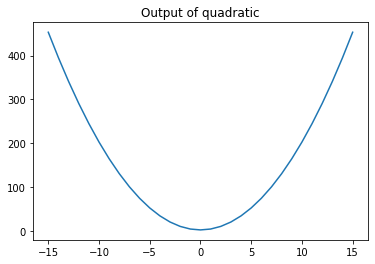

In [5]:
import matplotlib.pyplot as plt
x_axis = np.arange(31.) - 15.
y_axis = quadratic(x_axis)

plt.plot(x_axis, y_axis)
plt.title('Output of quadratic')

In [6]:
def quadratic_input(x, a, c):
    y = a * x**2. + c
    return y

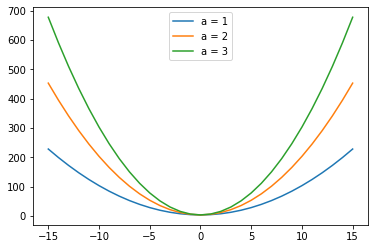

In [7]:
y_axis = quadratic_input(x_axis, 1., 3.)
y_axis_2 = quadratic_input(x_axis, 2., 3.)
y_axis_3 = quadratic_input(x_axis, 3., 3.)

plt.plot(x_axis, y_axis, label = 'a = 1')
plt.plot(x_axis, y_axis_2, label = 'a = 2')
plt.plot(x_axis, y_axis_3, label = 'a = 3')
plt.legend()

# Momentum and energy calculation

We're now going to create functions to calculate the momentum, energy and the associated errors with these quantities. We can start by making a function takes a mass `m` and velocity `v` and returns the momentum `p`. Call the function `momentum_function` 

$p = m * v$

In [ ]:
def momentum(m,v):
    p = m*v
    return p


Make another function called kinetic_energy_function that takes a mass m and velocity v and returns the kinetic energy

$K = 0.5 m v^2$

In [14]:
# Define your function which takes the argument m and an argument v
# Indent starting here
# Calculate K
# Return K
def KE(m,v):
    K = 0.5*m*(v**2)
    return K


Create a function to calculate the uncertainty in the momentum given the mass `m`, the uncertainty on the mass `delta_m`, the velocity `v` and the uncertainty on the velocity `delta_v`

Recall from the error propagation video lecture that if 

$A = X * Y$

That

$\delta A = A * \sqrt{\left(\frac{\delta X}{X}\right)^2 + \left(\frac{\delta Y}{Y}\right)^2}$

So, for 

$p=m*v$

we have

$\delta p = p*\sqrt{\left(\frac{\delta m}{m}\right)^2 + \left(\frac{\delta v}{v}\right)^2}$

In [17]:
# Define your function which takes the argument m, v, delta_m and delta_v
# Indent starting here
# Calculate delta_p
# Return delta_p

def uncertainty_momentum(m,v,delta_m,delta_v):
  UN = momentum(m,v) * np.sqrt((delta_m/m)**2 + (delta_v/v)**2)
  return UN


Create a function that takes all of the previous parameters and calculates the uncertainty in the energy. Recall from the error propagation video lecture:

If $w=v^2$, then

$$\delta w = 2 |w| \frac{\delta v}{|v|}$$

Let $z=mv^2=mw$, then
$$\delta z = |z| \sqrt{(\frac{\delta m}{m})^2+(\frac{\delta w}{w})^2} $$

Lastly we have $K=\frac{1}{2}mv^2 = \frac{1}{2}mw = \frac{1}{2}z$, 
$$\delta K =  |K| \frac{\delta z}{|z|}$$


In [15]:
# Define the function taking m, v, delta m, delta v
# Indent starting here
# Calculate delta_K
# Return delta_K

def uncertainty_KE(m,v, deltaM, deltaV):
  
    w = v**2
    DeltaW = 2 * w * (deltaV/(np.abs(v)))
    z = m * w
    DeltaZ = np.abs(z) * np.sqrt((deltaM/m)**2 + (DeltaW/w)**2)
    KE = 0.5 * z
    DeltaKE = np.abs(KE) * (DeltaZ/np.abs(z))

    return DeltaKE



Below use your functions to calculate the energy, momentum and their uncertainties for an object that weighs $m = 3.0 \pm 0.5 kg$ moving at a velocity of $30.0 \pm 5.0 m/s$

(Here delta_m=0.5 and delta_v=5)

In [21]:
#You have already defined the function so you just have to call them
print(momentum(3.0, 30.0))
print(uncertainty_momentum(3.0, 30.0, 0.5, 5))
print(KE(3.0, 30.0))
print(uncertainty_KE(3.0, 30.0, 0.5, 5))





1350.0
318.1980515339464
1350.0
503.1152949374527
